In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# set the number of rows for pandas output to display; default=10
pd.set_option('display.max_rows', 20)
#pd.set_option('display.max_rows', None)

In [11]:
# define the dataset
training_data = pd.read_csv('..\\data\\train.csv', index_col='ADDRESS')
training_data = training_data.select_dtypes(include=[np.number])
training_data = training_data.dropna(axis=0)
del training_data['Unnamed: 0']

# define X and y
X = training_data.loc[:, training_data.columns != 'SELL_PRICE']
y = training_data.SELL_PRICE   #target column i.e. price range

In [18]:
corr_matrix = training_data.corr()
corr_matrix["SELL_PRICE"].sort_values(ascending=False)

SELL_PRICE    1.000000
median_val    0.633192
ave_val       0.612879
ave_inc       0.536629
bach_pct      0.451755
                ...   
other_km     -0.168082
total_km     -0.173954
dwell_dens   -0.188342
rentr_pct    -0.201693
bark_km      -0.258390
Name: SELL_PRICE, Length: 60, dtype: float64

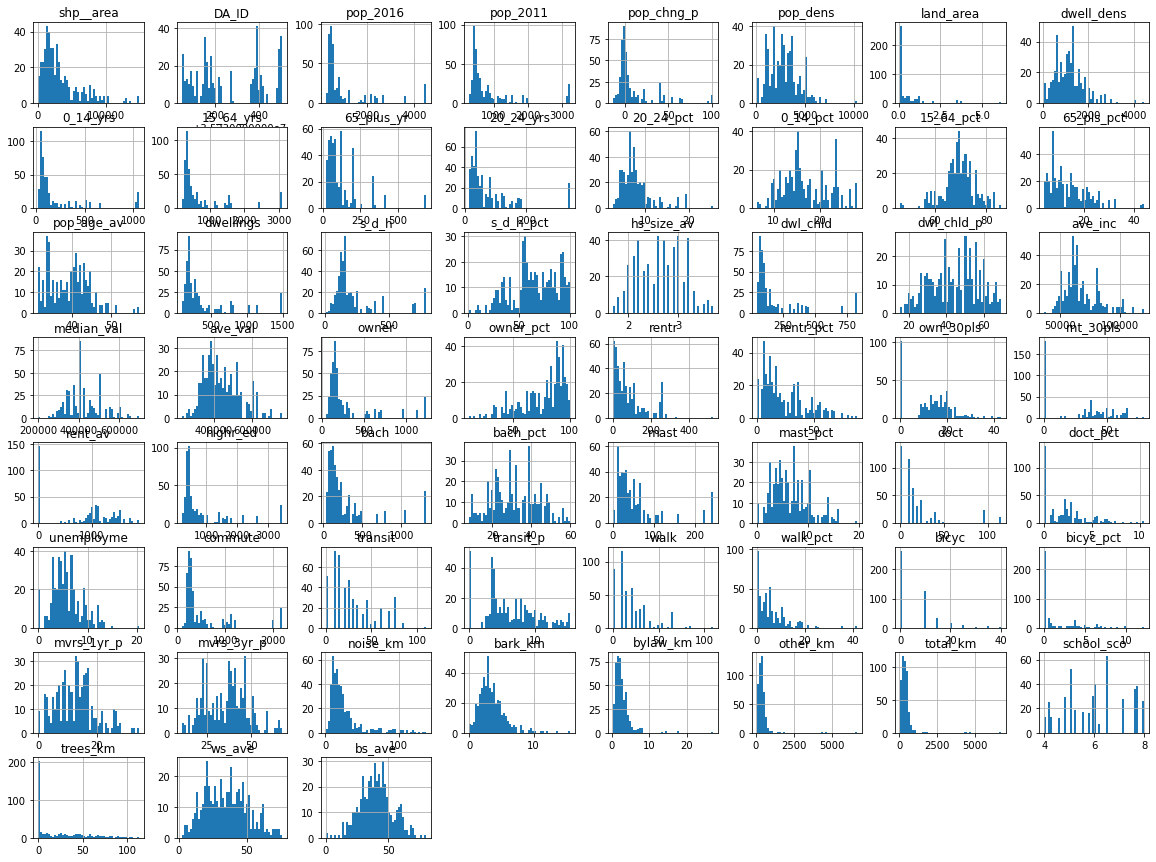

In [6]:
X.hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Sale Price vs ave_val')

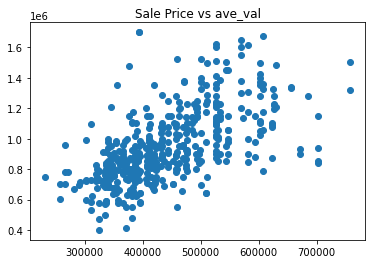

In [5]:
plt.scatter(training_data["ave_val"],training_data["SELL_PRICE"])
plt.title("Sale Price vs ave_val")

In [9]:
# testing correlation between random features
training_data['ave_val'].corr(training_data['SELL_PRICE'])

0.6128791243978302

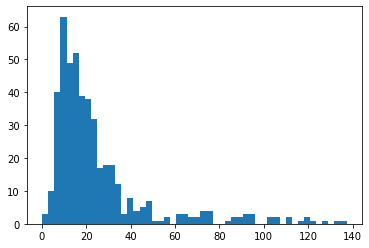

In [14]:
plt.hist(training_data["noise_km"], bins=50)
plt.show()

### Transformations for Skewed Distribution
##### Some different methods are Log, sqrt, exp, Box-cox, power etc. The commonly used method is Log Transformation

In [28]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
  
# create data
data = [training_data["noise_km"]]

# scale features
#scaler = MinMaxScaler()
#model = scaler.fit(data)
#scaled_data = model.transform(data)

scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(data)
minmax_df = pd.DataFrame(minmax_df)
minmax_df

,0,1,2,3,4,5,6,7,8,9,...,454,455,456,457,458,459,460,461,462,463
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


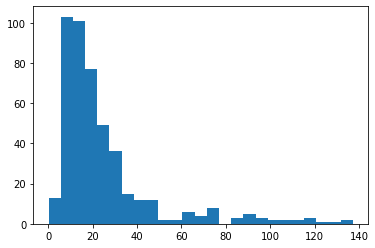

AttributeError: 'Series' object has no attribute 'reshape'

In [37]:
from sklearn.preprocessing import QuantileTransformer

# generate gaussian data sample
data = [training_data["noise_km"]]

# histogram of the raw data with a skew
plt.hist(data, bins=25)
plt.show()

# reshape data to have rows and columns
#data = data.reshape((len(data),1))
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(data)
# histogram of the transformed data
plt.hist(data_trans, bins=25)
plt.show()


### Feature Engineering

### Treating Outliers

In [ ]:
# Create a box plot. You’ll get Q1, Q2 and Q3. (data points > Q3 + 1.5IQR) 
# and (data points < Q1 – 1.5IQR) will be considered as outliers. 
# IQR is Interquartile Range. IQR = Q3-Q1